<a href="https://colab.research.google.com/github/aksamlwanga/BDM/blob/main/EDA_Big_Data_Lab/EDA_Big_Data_Lab_2(b)_Lwanga_Aksam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:blue; font-family:Arial;">Cleaning and Analyzing the kiva dataset</span>

## By LWANGA AKSAM MCS231016

<div style="display:flex; align-items:center;">
    <div style="flex:50%; padding:5px; text-align:left; align-self: center;">
        <p style="color:black; font-family:Arial, sans-serif; font-weight: bold;">Kiva.org is an online crowdfunding platform. Kiva uses crowdfunded microloans as a force for good to create a space where people can have a one-to-one impact, and together, expand financial access for all.
Kiva loans give people the power and resources to build their chosen life.
Kiva has funded over $1.5 billion in loans to help more than 2 million people build better lives for themselves and their families.
My notebook will try to analyze Kiva data to highlight valuable ideas to help improve their performance</p>
    </div>
</div>

## <span style="color:Brown; font-family:Arial;">Importing Libraries</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set()
import re

In [2]:
sns.set_style('ticks')
sns.set_palette('RdBu')

## <span style="color:Brown; font-family:Arial;">Loading Data</span>

In [4]:
kivaloans = pd.read_csv('kiva_loans.csv', parse_dates=True, index_col=['date'])

In [3]:
partners = pd.read_csv('loan_themes_by_region.csv')

## <span style="color:Brown; font-family:Arial;">Discover and Clean Data</span>

In [5]:
kivaloans.head(4)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval
date,,,,,,,,,,,,,,,,,,,
2014-01-01,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12.0,NaN,female,irregular
2014-01-01,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14.0,NaN,"female, female",irregular
2014-01-01,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6.0,"user_favorite, user_favorite",female,bullet
2014-01-01,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8.0,NaN,female,irregular


In [6]:
# number of rows & columns
kivaloans.shape

(119053, 19)

In [7]:
# all information about the data
kivaloans.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119053 entries, 2014-01-01 to NaT
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  119053 non-null  int64  
 1   funded_amount       119053 non-null  float64
 2   loan_amount         119053 non-null  float64
 3   activity            119053 non-null  object 
 4   sector              119053 non-null  object 
 5   use                 117355 non-null  object 
 6   country_code        119053 non-null  object 
 7   country             119053 non-null  object 
 8   region              104555 non-null  object 
 9   currency            119053 non-null  object 
 10  partner_id          115683 non-null  float64
 11  posted_time         119053 non-null  object 
 12  disbursed_time      118897 non-null  object 
 13  funded_time         113291 non-null  object 
 14  term_in_months      119052 non-null  float64
 15  lender_count        11905

## <span style="color:#288BA8; font-family:Arial;">CheckList:</span>
   - check for missing values
   - check for duplicate values
   - <span style="color:blue; font-family:Arial;">id:</span> convert datatype to 'object' and discover its data
   - <span style="color:blue; font-family:Arial;">loan_amount:</span> discover its data
   - <span style="color:blue; font-family:Arial;">funded_amount:</span> discover its data
   - <span style="color:blue; font-family:Arial;">activity:</span> discover its data
   - <span style="color:blue; font-family:Arial;">sector:</span> discover its data
   - <span style="color:blue; font-family:Arial;">use:</span> discover its data
   - <span style="color:blue; font-family:Arial;">country_code:</span> drop(not significant because the country column is present)
   - <span style="color:blue; font-family:Arial;">country:</span> discover its data
   - <span style="color:blue; font-family:Arial;">region:</span> discover its data
   - <span style="color:blue; font-family:Arial;">currency:</span> drop (not important because all loans borrowed in USD)
   - <span style="color:blue; font-family:Arial;">partner_id:</span> convert datatype to 'object' and discover its data
   - <span style="color:blue; font-family:Arial;">posted_time:</span>convert to Date/Time and discover its data
   - <span style="color:blue; font-family:Arial;">disbursed_time:</span>convert to Date/Time and discover its data
   - <span style="color:blue; font-family:Arial;">funded_time:</span> convert to Date/Time and discover its data
   - <span style="color:blue; font-family:Arial;">term_in_months:</span>
      - rename to loan_months
      - convert to 'int'
   - <span style="color:blue; font-family:Arial;">lender_count:</span> discover its data
   - <span style="color:blue; font-family:Arial;">tags:</span> drop (have alot of NAN values)   
   - <span style="color:blue; font-family:Arial;">borrower_genders:</span> ['male', 'female']
   - <span style="color:blue; font-family:Arial;">repayment_interval:</span> convert datatype to 'object'

### <span style="color:#288BA8; font-family:Arial;">Missing Values</span>

In [8]:
# check for missing values
kivaloans.isna().sum()

id                        0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                    1698
country_code              0
country                   0
region                14498
currency                  0
partner_id             3370
posted_time               0
disbursed_time          156
funded_time            5762
term_in_months            1
lender_count              1
tags                  52797
borrower_genders       1697
repayment_interval        1
dtype: int64

#### <span style="color:#288BA8; font-family:Arial;">Handling missing values:</span>
   - tags column not important and has alot of missing values so i can drop it
   - The region column missing values can be filled with the country column
   - because the funded_time as very close to posted_time its missing values can be filled with posted_time values
   - The use column can drop its missing values
   - partener_id column cannot fill its missing values so i can dorp them
   - disbursed_time column can drop its missing values
   - borrower_gender column too can drop its missing values

#### <span style="color:blue; font-family:Arial;">tags column:</span>

In [9]:
kivaloans = kivaloans.drop('tags', axis=1)

#### <span style="color:blue; font-family:Arial;">region column:</span>

In [10]:
kivaloans['region'].fillna(kivaloans['country'], inplace=True)

#### <span style="color:blue; font-family:Arial;">funded_time column:</span>

In [11]:
kivaloans['funded_time'].fillna(kivaloans['posted_time'], inplace=True)

#### <span style="color:blue; font-family:Arial;">use column, disbursed_time, borrower_genders, partener_id:</span>

In [12]:
kivaloans.dropna(subset=['use', 'disbursed_time', 'borrower_genders', 'partner_id'], inplace=True)

In [13]:
# confirm handling missing values
kivaloans.isna().sum()

id                    0
funded_amount         0
loan_amount           0
activity              0
sector                0
use                   0
country_code          0
country               0
region                0
currency              0
partner_id            0
posted_time           0
disbursed_time        0
funded_time           0
term_in_months        0
lender_count          0
borrower_genders      0
repayment_interval    0
dtype: int64

In [14]:
kivaloans.shape

(114005, 18)

#### <span style="color:navy; font-family:Ari4al;font-weight: bold;">After handling the missing values, the data lost 17315 rows</span>

### <span style="color:#288BA8; font-family:Arial;">Duplicate Values</span>

In [15]:
kivaloans.duplicated().all()

False

#### <span style="color:navy; font-family:Ari4al;font-weight: bold;">This shows that there is no duplicate values</span>

### <span style="color:#288BA8; font-family:Arial;">id: </span>
  -- Unique ID for loan
  - convert datatype to 'object' and discover its data

In [16]:
# convert datatype to object
kivaloans['id']= kivaloans['id'].astype(object)

In [17]:
# confirm the datatype
kivaloans['id'].dtype

dtype('O')

In [18]:
# discover the id column
kivaloans['id'].nunique()

114005

### <span style="color:#288BA8; font-family:Arial;">loan_amount: </span>
   -- The amount disbursed by Kiva to the field agent(USD)
   - discover its data

In [19]:
kivaloans['loan_amount'].sum()

100438450.0

In [20]:
kivaloans['loan_amount'].describe()

count    114005.000000
mean        881.000395
std        1124.211943
min          25.000000
25%         300.000000
50%         525.000000
75%        1025.000000
max      100000.000000
Name: loan_amount, dtype: float64

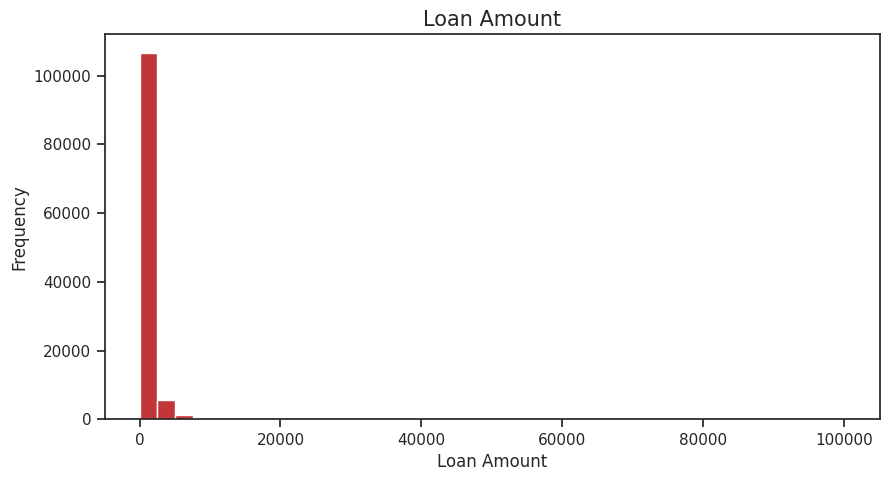

In [21]:
#Visualize loan amount on histogram
plt.figure(figsize = (10,5))
plt.title('Loan Amount', fontsize = 15)
plt.hist(kivaloans['loan_amount'], bins = 40)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

### <span style="color:#288BA8; font-family:Arial;">funded_amount:</span>
   -- The amount disbursed by the field agent to the borrower(USD)
   - discover its data

In [22]:
kivaloans['funded_amount'].sum()

97241200.0

In [23]:
kivaloans['funded_amount'].describe()

count    114005.000000
mean        852.955572
std        1099.285929
min          25.000000
25%         300.000000
50%         500.000000
75%        1000.000000
max      100000.000000
Name: funded_amount, dtype: float64

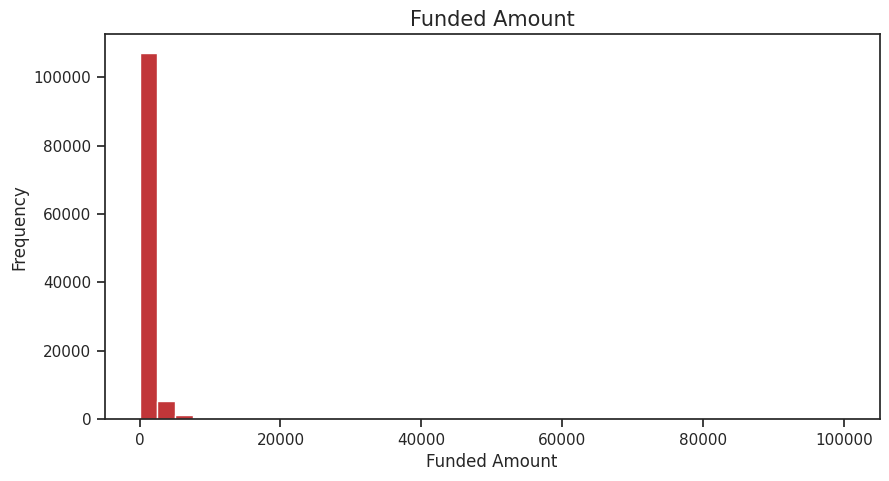

In [24]:
#Visualize funded amount on histogram
plt.figure(figsize = (10,5))
plt.title('Funded Amount', fontsize = 15)
plt.hist(kivaloans['funded_amount'], bins = 40)
plt.xlabel('Funded Amount')
plt.ylabel('Frequency')
plt.show()

### <span style="color:#288BA8; font-family:Arial;">activity:</span>
   -- More granular category
   - discover its data

In [25]:
kivaloans['activity'].nunique()

152

In [26]:
activity_counts= kivaloans['activity'].value_counts()
activity_counts

Farming                      11809
General Store                10237
Personal Housing Expenses     7199
Agriculture                   5592
Retail                        5325
                             ...  
Patchwork                        1
Film                             1
Adult Care                       1
Aquaculture                      1
Landscaping / Gardening          1
Name: activity, Length: 152, dtype: int64

#### <span style="color:navy; font-family:Ari4al;font-weight: bold;">This shows that the field of Farming is the most targeted field for the borrower category</span>

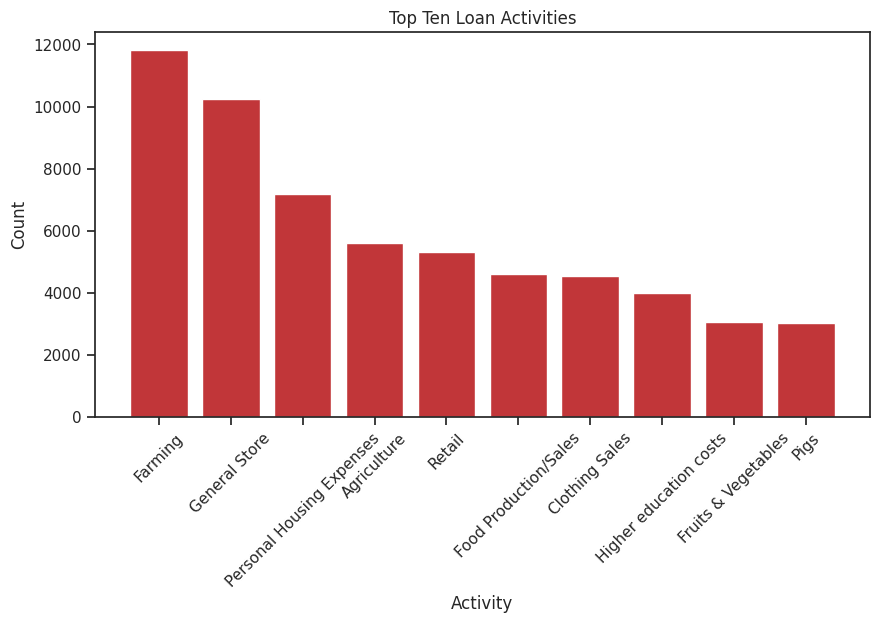

In [27]:
# Plot a bar chart for top ten activities
plt.figure(figsize = (10,5))
plt.bar(activity_counts.index[:10], activity_counts[:10])
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Top Ten Loan Activities')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

### <span style="color:#288BA8; font-family:Arial;">sector:</span>
   -- High level category
   - discover its data

In [42]:
kivaloans['sector'].unique()

array(['Food', 'Transportation', 'Arts', 'Agriculture', 'Services',
       'Manufacturing', 'Wholesale', 'Retail', 'Clothing', 'Construction',
       'Health', 'Education', 'Personal Use', 'Housing', 'Entertainment'],
      dtype=object)

In [43]:
sector_counts= kivaloans['sector'].value_counts()
sector_counts

Agriculture       29065
Food              24312
Retail            22507
Services           7535
Housing            7477
Clothing           6316
Education          5242
Personal Use       3221
Transportation     3008
Arts               1644
Manufacturing      1274
Construction       1237
Health              928
Entertainment       126
Wholesale           113
Name: sector, dtype: int64

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;">This proves that the field of agriculture is the most targeted field for the borrower category</span>

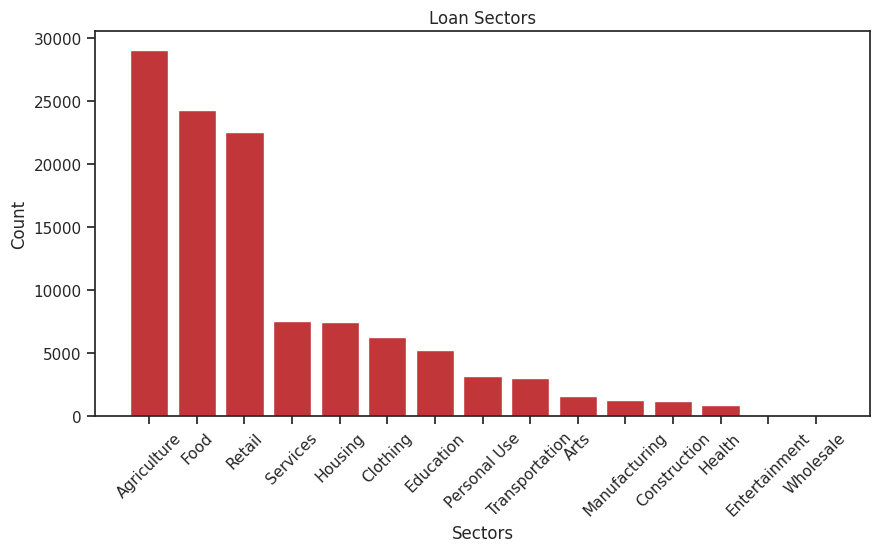

In [44]:
# Plot a bar chart for loan sectors
plt.figure(figsize = (10,5))
plt.bar(sector_counts.index, sector_counts)
plt.xlabel('Sectors')
plt.ylabel('Count')
plt.title('Loan Sectors')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

### <span style="color:#288BA8; font-family:Arial;">use:</span>
   -- Exact usage of loan amount
   - discover its data

In [45]:
def handle_use(x):
    list_x = x.split(' ')
    if 'filter' in list_x or 'filters' in list_x:
        return 'buy water filter'
    elif 'toilet' in list_x or 'latrine' in list_x:
        return 'build sanitary toilet'
    elif 'fertilizers' in list_x or 'fertilizer' in list_x:
        return 'buy fertilizers and other farm supplies'
    elif 'pigs.' in list_x:
        return 'buy feeds and other supplies to Pigs'
    elif 'groceries' in list_x:
        return 'buy groceries to sell'
    elif 'solar' in list_x:
        return 'buy solar'
    elif 'ingredients' in list_x:
        return 'buy ingredients forfood production business'
    elif 'merchandise' in list_x:
        return 'buy enough merchandise to sell at markets'
    elif 'clothing' in list_x or 'clothing,' in list_x:
        return 'clothing to sell'
    elif 'clothing' in list_x:
        return 'clothing to sell'
    elif 'livestock' in list_x or 'livestock.' in list_x:
        return 'buy feeds and other supplies to livestock'
    elif 'construction ' in list_x:
        return 'purchase building materials and construction labor'
    elif 'farm' in list_x:
        return 'buy farm inputs'
    else:
        return x

In [46]:
kivaloans['use']= kivaloans['use'].apply(handle_use)

In [47]:
kivaloans['use'].value_counts().head(20)

buy fertilizers and other farm supplies                                      7314
buy ingredients forfood production business                                  2278
clothing to sell                                                             2201
buy groceries to sell                                                        1749
buy enough merchandise to sell at markets                                    1172
buy solar                                                                     958
buy farm inputs                                                               883
buy feeds and other supplies to Pigs                                          874
buy feeds and other supplies to livestock                                     786
build sanitary toilet                                                         649
to purchase building materials and pay for construction labor                 561
to purchase building materials and pay for construction labor.                399
buy water filter

In [48]:
use_counts= kivaloans['use'].value_counts().head(10)
use_counts.columns=['use', 'count']
use_counts

buy fertilizers and other farm supplies        7314
buy ingredients forfood production business    2278
clothing to sell                               2201
buy groceries to sell                          1749
buy enough merchandise to sell at markets      1172
buy solar                                       958
buy farm inputs                                 883
buy feeds and other supplies to Pigs            874
buy feeds and other supplies to livestock       786
build sanitary toilet                           649
Name: use, dtype: int64

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;">This shows that buy fertilizers and other farm supplies is one of the most common reasons for taking these loans and this proves that the field of agriculture is the most targeted field for the borrower category</span>

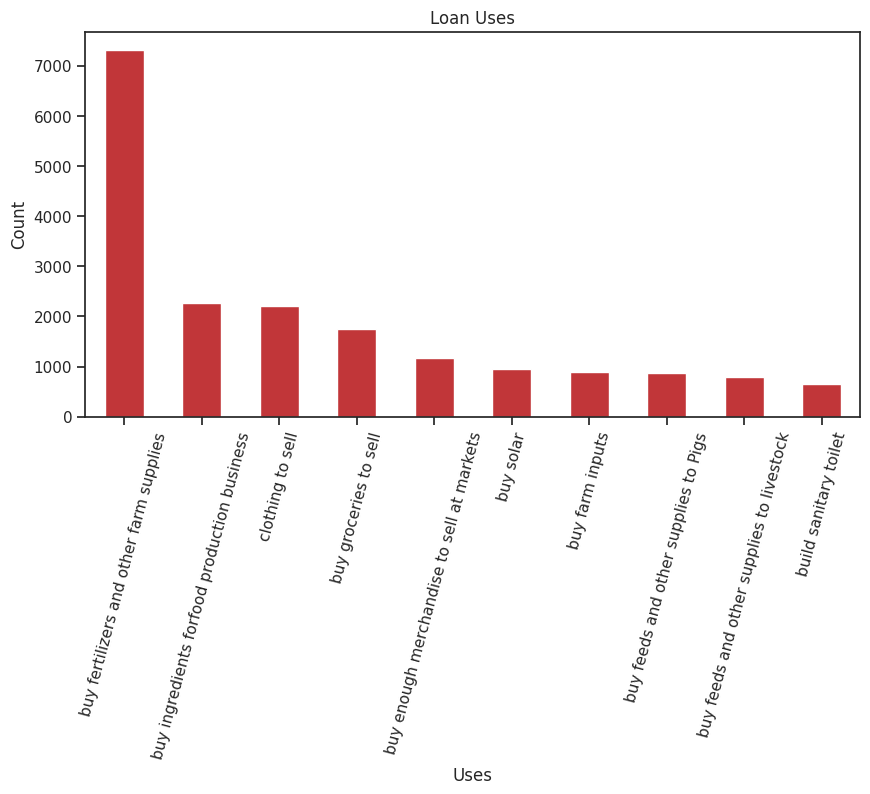

In [49]:
plt.figure(figsize = (10,5))
use_counts.plot(kind='bar')
plt.xlabel('Uses')
plt.ylabel('Count')
plt.title('Loan Uses')
plt.xticks(rotation=75)  # Rotate x-axis labels for better readability if needed
plt.show()

### <span style="color:#288BA8; font-family:Arial;">country_code:</span>
   -- ISO country code of country in which loan was disbursed
   - discover its data

In [50]:
kivaloans['country_code'].value_counts()

KeyError: ignored

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;">This shows that the Philippines is one of the most countries that takes loans, followed by Kenya</span>

### <span style="color:#288BA8; font-family:Arial;">country:</span>
   -- Full country name of country in which loan was disbursed
   - discover its data

In [35]:
kivaloans['country'].unique()

array(['Pakistan', 'India', 'Kenya', 'Nicaragua', 'El Salvador',
       'Tanzania', 'Philippines', 'Peru', 'Senegal', 'Cambodia',
       'Liberia', 'Vietnam', 'Iraq', 'Honduras', 'Palestine', 'Mongolia',
       'United States', 'Mali', 'Colombia', 'Tajikistan', 'Guatemala',
       'Ecuador', 'Bolivia', 'Yemen', 'Ghana', 'Sierra Leone', 'Haiti',
       'Chile', 'Jordan', 'Uganda', 'Burundi', 'Burkina Faso',
       'Timor-Leste', 'Indonesia', 'Georgia', 'Ukraine', 'Kosovo',
       'Albania', 'The Democratic Republic of the Congo', 'Costa Rica',
       'Somalia', 'Zimbabwe', 'Cameroon', 'Turkey', 'Azerbaijan',
       'Dominican Republic', 'Brazil', 'Mexico', 'Kyrgyzstan', 'Armenia',
       'Paraguay', 'Lebanon', 'Samoa', 'Israel', 'Rwanda', 'Zambia',
       'Nepal', 'Congo', 'Mozambique', 'South Africa', 'Togo', 'Benin',
       'Belize', 'Suriname', 'Thailand', 'Nigeria', 'Mauritania',
       'Vanuatu', 'Panama', 'Saint Vincent and the Grenadines',
       "Lao People's Democratic Republic

In [36]:
kivaloans['country'].nunique()

74

In [37]:
kivaloans['country'].value_counts()

Philippines                         24243
Kenya                                9576
El Salvador                          8468
Peru                                 5278
Uganda                               5015
                                    ...  
Panama                                  4
Malawi                                  4
Moldova                                 3
Saint Vincent and the Grenadines        2
Mauritania                              1
Name: country, Length: 74, dtype: int64

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;">This proves that the Philippines is one of the most countries that takes loans, followed by Kenya</span>

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;"> The country_code column is the same as country column so i will drop it to minimaize the dataframe</span>

In [38]:
kivaloans = kivaloans.drop('country_code', axis=1)

### <span style="color:#288BA8; font-family:Arial;">region:</span>
   -- Full region name within the country
   - discover its data

In [39]:
kivaloans['region'].value_counts()

El Salvador         4906
Lahore              1697
Kaduna              1382
Rwanda              1076
Iraq                 968
                    ... 
Bordu                  1
Ak - Tam village       1
Shalta village         1
Mpika                  1
Rudi, Soroca           1
Name: region, Length: 5414, dtype: int64

### <span style="color:#288BA8; font-family:Arial;">currency:</span>
   -- The currency in which the loan was disbursed
   - discover its data

In [40]:
kivaloans['currency'].unique()

array(['PKR', 'INR', 'KES', 'NIO', 'USD', 'TZS', 'PHP', 'PEN', 'XOF',
       'LRD', 'VND', 'HNL', 'MNT', 'COP', 'GTQ', 'TJS', 'BOB', 'YER',
       'KHR', 'GHS', 'SLL', 'HTG', 'CLP', 'JOD', 'UGX', 'BIF', 'IDR',
       'GEL', 'UAH', 'EUR', 'ALL', 'CRC', 'XAF', 'TRY', 'AZN', 'DOP',
       'BRL', 'MXN', 'KGS', 'AMD', 'PYG', 'LBP', 'WST', 'ILS', 'RWF',
       'ZMW', 'NPR', 'MZN', 'ZAR', 'BZD', 'SRD', 'NGN', 'VUV', 'XCD',
       'LAK', 'MMK', 'MWK', 'ZWD', 'MDL'], dtype=object)

In [41]:
kivaloans['country'].nunique()

74

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;"> The same number of unique values as country column so This column shows the currency of each country, but loans are disbursed in dollars</span>

### <span style="color:#288BA8; font-family:Arial;">partner_id:</span>
   -- ID of partner organization
   - convert datatype to 'object'
   - discover its data

In [51]:
#convert datatype to 'object'
kivaloans['partner_id']= kivaloans['partner_id'].astype(int)
kivaloans['partner_id']= kivaloans['partner_id'].astype(object)

In [52]:
kivaloans['partner_id'].nunique()

235

In [53]:
kivaloans['partner_id'].value_counts()

145    14957
81      3707
199     3456
204     2930
164     2774
       ...  
315        1
313        1
348        1
415        1
268        1
Name: partner_id, Length: 235, dtype: int64

In [54]:
kivaloans['partner_id'].nunique()

235

### <span style="color:#288BA8; font-family:Arial;">posted_time:</span>
   -- The time at which the loan is posted on Kiva by the field agent
   - convert to Date/Time
   - discover its data

In [55]:
# convert to datetime type
kivaloans['posted_time']= pd.to_datetime(kivaloans['posted_time'])

In [56]:
# start date
kivaloans['posted_time'].dt.date.min()

datetime.date(2014, 1, 1)

In [57]:
# end date
kivaloans['posted_time'].dt.date.max()

datetime.date(2014, 9, 17)

In [58]:
# start time
kivaloans['posted_time'].dt.time.min()

datetime.time(0, 0, 3)

In [59]:
# end time
kivaloans['posted_time'].dt.time.max()

datetime.time(23, 59, 57)

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;">This shows that the starting of post loans was in 1/1/2014 and the end is 26/7/2017 and posting was 24 hours in aday</span>

### <span style="color:#288BA8; font-family:Arial;">disbursed_time:</span>
   -- The time at which the loan is disbursed by the field agent to the borrower
   - convert to Date/Time
   - discover its data

In [60]:
# convert todatetime
kivaloans['disbursed_time']= pd.to_datetime(kivaloans['disbursed_time'])

In [61]:
# start date
kivaloans['disbursed_time'].dt.date.min()

datetime.date(2013, 12, 2)

In [62]:
# end date
kivaloans['disbursed_time'].dt.date.max()

datetime.date(2014, 12, 8)

In [63]:
# start time
kivaloans['disbursed_time'].dt.time.min()

datetime.time(7, 0)

In [64]:
# end time
kivaloans['posted_time'].dt.time.max()

datetime.time(23, 59, 57)

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;">This shows that the starting of disbursing the loans was in 2/12/2013 and the end is 30/9/2017 and disbursing was 24 hours in aday</span>

In [65]:
# This for dash board usage
kivaloans['disbursed_date'] = kivaloans['disbursed_time'].dt.date

### <span style="color:#288BA8; font-family:Arial;">funded_time:</span>
   -- The time at which the loan posted to Kiva gets funded by lenders completely
   - convert to Date/Time
   - discover its data

In [66]:
# convert to datetime
kivaloans['funded_time']= pd.to_datetime(kivaloans['funded_time'])

In [67]:
# start date
kivaloans['funded_time'].dt.date.min()

datetime.date(2014, 1, 1)

In [68]:
# end date
kivaloans['funded_time'].dt.date.max()

datetime.date(2014, 11, 17)

In [ ]:
# start time
kivaloans['funded_time'].dt.time.min()

In [70]:
# end time
kivaloans['funded_time'].dt.time.max()

datetime.time(23, 59, 58)

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;"> as posted_time column was started in 1/1/2014 and ended in 26/7/2017 and was 24 hours in aday</span>

### <span style="color:#288BA8; font-family:Arial;">term_in_months:</span>
   -- The duration for which the loan was disbursed in months
   - rename to loan_months
   - convert to 'int'
   - discover its data

In [71]:
# rename term_in_mouths column
kivaloans.rename(columns={'term_in_months': 'loan_months'}, inplace=True)

In [72]:
# convert datatype to 'int'
kivaloans['loan_months']= kivaloans['loan_months'].astype(int)

In [73]:
kivaloans['loan_months'].unique()

array([ 12,  11,  43,  14,  13,  10,   8,   5,  20,   7,  17,  15,   9,
        39,  23,  26,   6,  22,  25,  27,  16,  52,  18,  19,  28,  62,
        32,  21,  50,  35,  38,  72, 137,  49,  33,  42,  29,  37,  36,
        51,  24, 113,  30,   4,  79,  31,  44,  74,  34,  48, 114,  40,
       124, 104,  63,  85,  78,  70,  86,  61,  60,  67,  55,  53,   3,
        41,  68,   2, 143,  77, 130,  45, 134, 107, 142, 148, 111,  56,
       122, 141, 110,  81, 106,  54, 147, 112,  59, 145, 121, 109,  80,
        47,  97,  75, 101, 128,  98,  87,  66,  46, 125,  76,  73])

In [74]:
kivaloans['loan_months'].value_counts()

14     27819
8      21814
11      8054
12      5661
7       5581
       ...  
111        1
122        1
110        1
106        1
73         1
Name: loan_months, Length: 103, dtype: int64

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;">This shows that within a year the loan disbursement is often completed</span>

### <span style="color:#288BA8; font-family:Arial;">lender_count:</span>
   -- The total number of lenders that contributed to this loan
   - discover its data

In [75]:
# number of lender distribution
kivaloans['lender_count'].value_counts()

10.0     5801
9.0      5595
8.0      5138
7.0      4823
5.0      4440
         ... 
304.0       1
281.0       1
300.0       1
517.0       1
348.0       1
Name: lender_count, Length: 344, dtype: int64

In [77]:
# total number of lenders
kivaloans['lender_count'].sum()

2753030.0

In [78]:
# maximum number of lenders per loan
kivaloans['lender_count'].max()

2986.0

In [79]:
# minimum number of lenders per loan
kivaloans['lender_count'].min()

1.0

### <span style="color:#288BA8; font-family:Arial;">repayment_interval:</span>
   -- the method for repaying the loan
   - convert datatype to 'object'
   - discover its data

In [80]:
kivaloans['repayment_interval']= kivaloans['repayment_interval'].astype(object)

In [81]:
kivaloans['repayment_interval'].unique()

array(['irregular', 'bullet', 'monthly'], dtype=object)

In [82]:
kivaloans['repayment_interval'].value_counts()

monthly      58910
irregular    44582
bullet       10513
Name: repayment_interval, dtype: int64

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;">This shows that monthly payment is prevailing</span>

### <span style="color:#288BA8; font-family:Arial;">borrower_genders:</span>
   -- Comma separated M,F letters, where each instance represents a single male/female in the group
   - discover its data
   - split it to female and male

In [83]:
# borrower_genders values distribution
kivaloans['borrower_genders'].value_counts()

female                                                                                                                                                                                                                                  72211
male                                                                                                                                                                                                                                    25740
female, female                                                                                                                                                                                                                           2035
female, female, female                                                                                                                                                                                                                   1996
female, female, female, female                  

In [84]:
# number of unique values
kivaloans['borrower_genders'].nunique()

1665

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;">This shows cells with many values for females and males, and I plan to add a borrower_count column which has the number of females and the number of males in each cell collected in the form of a tuple</span>

In [85]:
# function to count the occurance of female and male
def count_category(cell):
    if cell=='female':
        female_count=1
        male_count=0
    elif cell=='male':
        female_count=0
        male_count=1
    else:
        counts = cell.split(', ')
        female_count = counts.count('female')
        male_count = counts.count('male')
    return female_count + male_count

In [86]:
#Now i will add gender_count column to kivloans dataframe
kivaloans['borrower_count']= kivaloans['borrower_genders'].apply(count_category)

In [87]:
# confirm processing
kivaloans['borrower_count'].nunique()

49

In [88]:
kivaloans['borrower_genders'] = kivaloans['borrower_genders'].apply(lambda x: 'both' if x not in(['female', 'male']) else x)

In [89]:
kivaloans['borrower_genders'].unique()

array(['female', 'both', 'male'], dtype=object)

<span style="color:navy; font-family:Ari4al; font-weight: bold;">Now the borrower_count column  has been added to our data and the borrower_gender column has been handled</span>

In [90]:
kivaloans.shape

(114005, 19)

In [91]:
kivaloans.isna().sum()

id                    0
funded_amount         0
loan_amount           0
activity              0
sector                0
use                   0
country               0
region                0
currency              0
partner_id            0
posted_time           0
disbursed_time        0
funded_time           0
loan_months           0
lender_count          0
borrower_genders      0
repayment_interval    0
disbursed_date        0
borrower_count        0
dtype: int64

In [92]:
kivaloans.duplicated().sum()

0

In [93]:
kivaloans.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114005 entries, 2014-01-01 to 2014-09-17
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  114005 non-null  object             
 1   funded_amount       114005 non-null  float64            
 2   loan_amount         114005 non-null  float64            
 3   activity            114005 non-null  object             
 4   sector              114005 non-null  object             
 5   use                 114005 non-null  object             
 6   country             114005 non-null  object             
 7   region              114005 non-null  object             
 8   currency            114005 non-null  object             
 9   partner_id          114005 non-null  object             
 10  posted_time         114005 non-null  datetime64[ns, UTC]
 11  disbursed_time      114005 non-null  datetime64[ns, UTC]
 12  

## <span style="color:Brown; font-family:Arial;">EDA Questions:</span>

### <span style="color:blue; font-family:Arial;">Time:</span>
   - what is the total loans per year for funded and loan amounts?
   - what is the total loans per month for funded and loan amounts for each year?
   - what is the distribution of sectors per year?
### <span style="color:blue; font-family:Arial;">Sectors:</span>
   - According to activities, What is the Total loan amount for gender?
   - What sector got the most loans?
   - For each sector, What is the distribution of borrower_gender?
   - For the top sector, what activity had the highest amount of loans?
### <span style="color:blue; font-family:Arial;">Country:</span>
   - What country got the most loans?
   - For each country, Which region had the highest loan amounts?
   - For each country, which common repayment interval?
   - For each country, What is the distribution of borrower_gender?
   - For each country, what is the most common sectors?
### <span style="color:blue; font-family:Arial;">Partners:</span>
   - Who are the most dominant field partners?
   - For each country, What is the number of partners according to sectors?
### <span style="color:blue; font-family:Arial;">group_borrower data:</span>
   - What is the most sectors have grouped_borrower?
   - What is the most countries have grouped_borrower?
   - What is the most use have grouped_borrower?
   - What is the common repayment intervals for grouped_borrower?
   - what is the total loans per year for grouped_borrower?
    

## <span style="color:#288BA8; font-family:Arial;">Time:</span>

#### <span style="color:#000000; font-family:Georgia, serif;">what is the total loans per year for funded and loan amounts?</span>

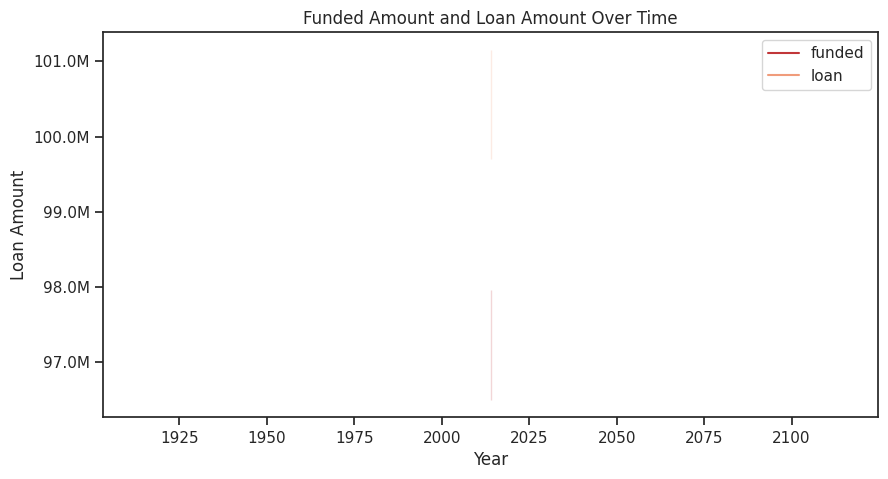

In [94]:
plt.figure(figsize = (10,5))
# Plot line chart for 'funded_amount'
sns.lineplot(data=kivaloans, x=kivaloans.index.year, y='funded_amount', estimator=sum, label='funded')

# Plot line chart for 'loan_amount'
sns.lineplot(data=kivaloans, x=kivaloans.index.year, y='loan_amount', estimator=sum, label='loan')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Loan Amount')
plt.title('Funded Amount and Loan Amount Over Time')
plt.legend()
# Convert y-axis tick labels to millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
# Show the plot
plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">what is the total loans per month for funded and loan amounts for each year?</span>

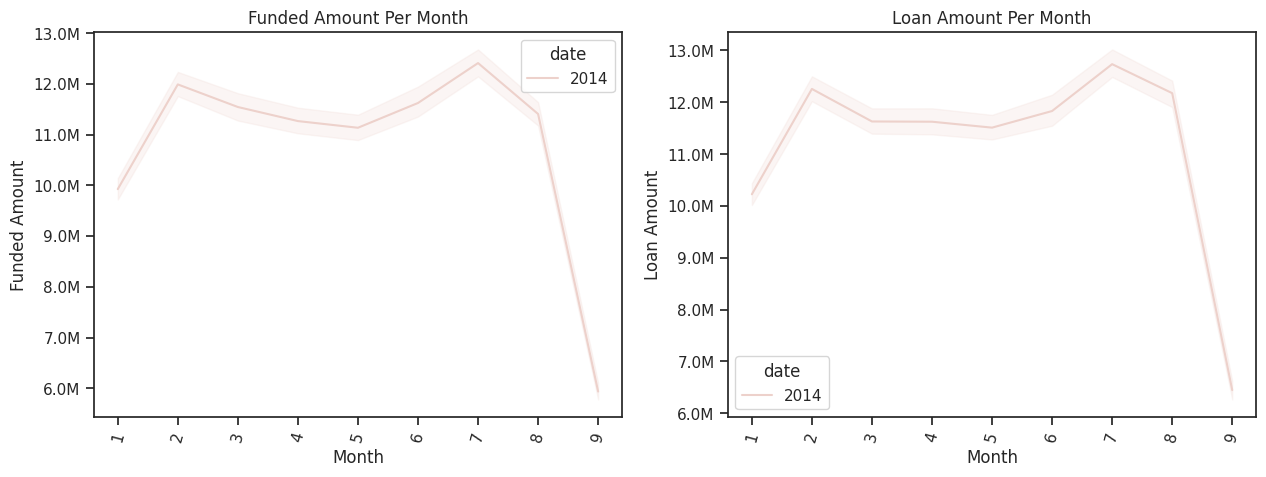

In [95]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
sns.lineplot(data = kivaloans, x = kivaloans.index.month, y = 'funded_amount', estimator=sum, hue=kivaloans.index.year)
plt.title('Funded Amount Per Month')
plt.xlabel('Month')
plt.ylabel('Funded Amount')
plt.xticks(rotation = 75)
# Convert y-axis tick labels to millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

plt.subplot(1,2,2)
sns.lineplot(data = kivaloans, x = kivaloans.index.month, y = 'loan_amount', estimator=sum, hue=kivaloans.index.year)
plt.title("Loan Amount Per Month")
plt.xlabel('Month')
plt.ylabel('Loan Amount')
plt.xticks(rotation = 75)
# Convert y-axis tick labels to millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))


plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">what is the total loan_amount of each sector per year?</span>

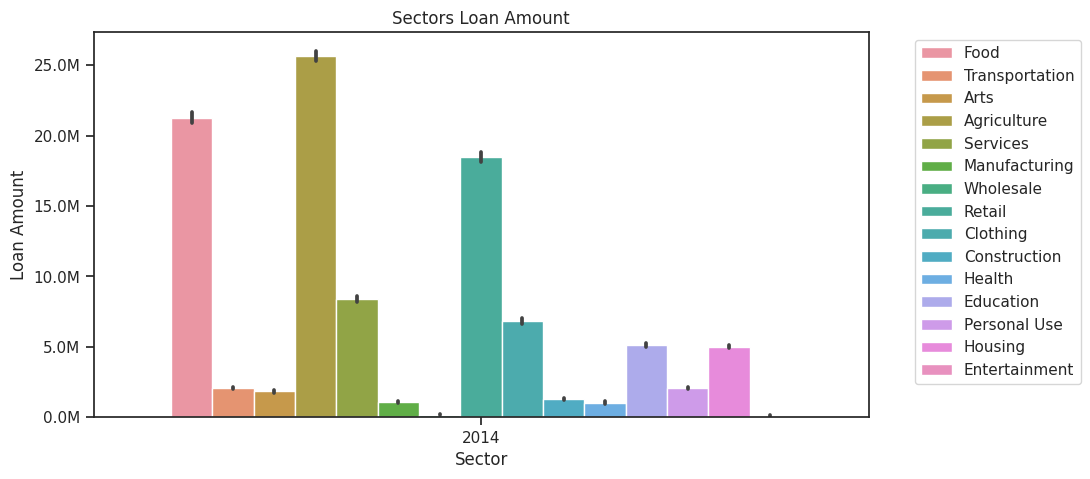

In [96]:
plt.figure(figsize = (10,5))
# Plot bar chart for sectors loan amount per year
sns.barplot(data=kivaloans, x=kivaloans.index.year, y='loan_amount', estimator=sum, hue='sector')

# Set the labels and title
plt.xlabel('Sector')
plt.ylabel('Loan Amount')
plt.title('Sectors Loan Amount')
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Convert y-axis tick labels to millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Show the plot
plt.show()

## <span style="color:#288BA8; font-family:Arial;">Country:</span>

#### <span style="color:#000000; font-family:Georgia, serif;">What country got the most loans?</span>

In [97]:
country_loan_amount = kivaloans.groupby('country')['loan_amount'].sum()\
        .sort_values(ascending = False).head(10).reset_index()
country_loan_amount

,country,loan_amount
0,Philippines,8765150.0
1,Peru,5925275.0
2,Kenya,5348575.0
3,El Salvador,5295600.0
4,Paraguay,4414800.0
5,Uganda,3753225.0
6,Cambodia,3359175.0
7,Tajikistan,3170925.0
8,Bolivia,3011400.0
9,Nicaragua,2921000.0


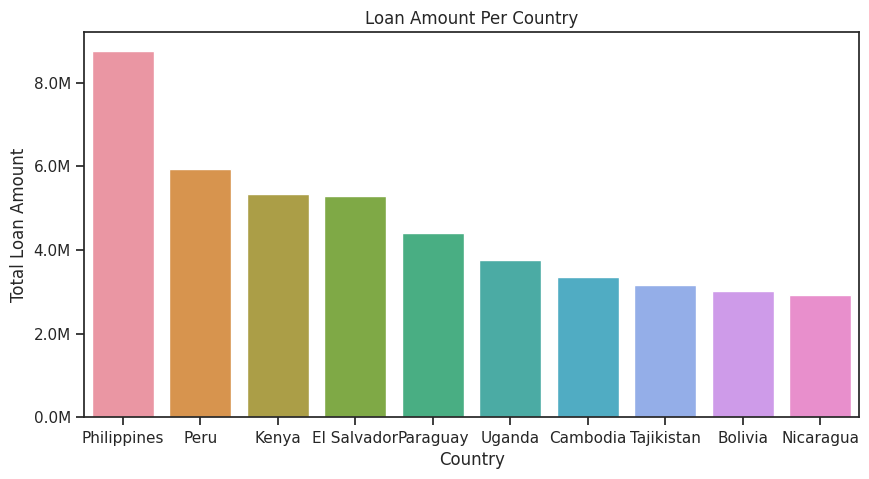

In [98]:
plt.figure(figsize = (10,5))
# Plot bar chart for hieghst countries loan amount
sns.barplot(data=country_loan_amount, x='country', y='loan_amount')

# Set the labels and title
plt.xlabel('Country')
plt.ylabel('Total Loan Amount')
plt.title('Loan Amount Per Country')
# Convert y-axis tick labels to millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
# Show the plot
plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">For each country, Which region had the highest loan amounts?</span>

In [99]:
# Group the data by country and region, and calculate the sum of loan amounts
grouped_data = kivaloans.groupby(['country','region'])['loan_amount'].sum().sort_values(ascending=False).reset_index()

# Find the region with the highest loan amount for each country
max_loan_regions = grouped_data.loc[grouped_data.groupby('country')['loan_amount'].idxmax()]\
     .sort_values(by='loan_amount', ascending=False).head(10).reset_index(drop=True)

# Display the result
max_loan_regions

,country,region,loan_amount
0,El Salvador,El Salvador,2760325.0
1,Iraq,Iraq,2551450.0
2,The Democratic Republic of the Congo,"Goma, North Kivu province",1852975.0
3,Senegal,Senegal,1695525.0
4,Tanzania,Dar es Salaam,1585650.0
5,Peru,Cusco,1411675.0
6,Rwanda,Rwanda,1314200.0
7,Pakistan,Lahore,917700.0
8,Bolivia,La Paz / El Alto,862300.0
9,Vietnam,Thanh Hoá,784025.0


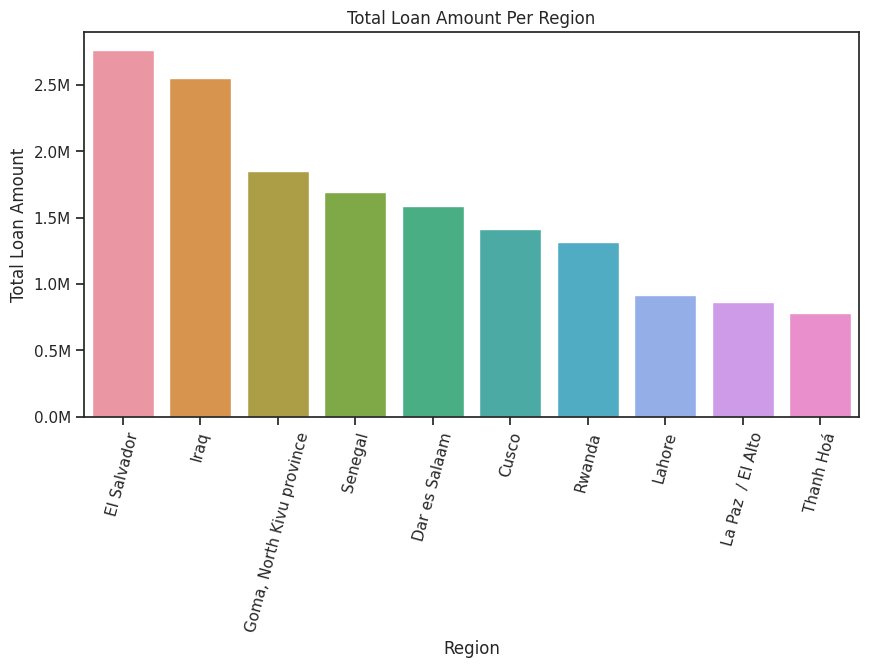

In [100]:
plt.figure(figsize = (10,5))
# Plot bar chart for hieghst countries loan amount
sns.barplot(data=max_loan_regions, x='region', y='loan_amount')

# Set the labels and title
plt.xlabel('Region')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount Per Region')
# Convert y-axis tick labels to millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.xticks(rotation = 75)

# Show the plot
plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">For each country, which common repayment interval?</span>

In [101]:
common_repayment = kivaloans.groupby(['country','repayment_interval']).size().sort_values(ascending=False).reset_index(name='count').head(20)
common_repayment

,country,repayment_interval,count
0,Philippines,irregular,21024
1,El Salvador,monthly,6169
2,Kenya,monthly,5389
3,Cambodia,monthly,4569
4,Kenya,irregular,3554
5,Peru,monthly,3357
6,Uganda,monthly,3158
7,Colombia,monthly,2976
8,Tajikistan,monthly,2948
9,Nicaragua,monthly,2667


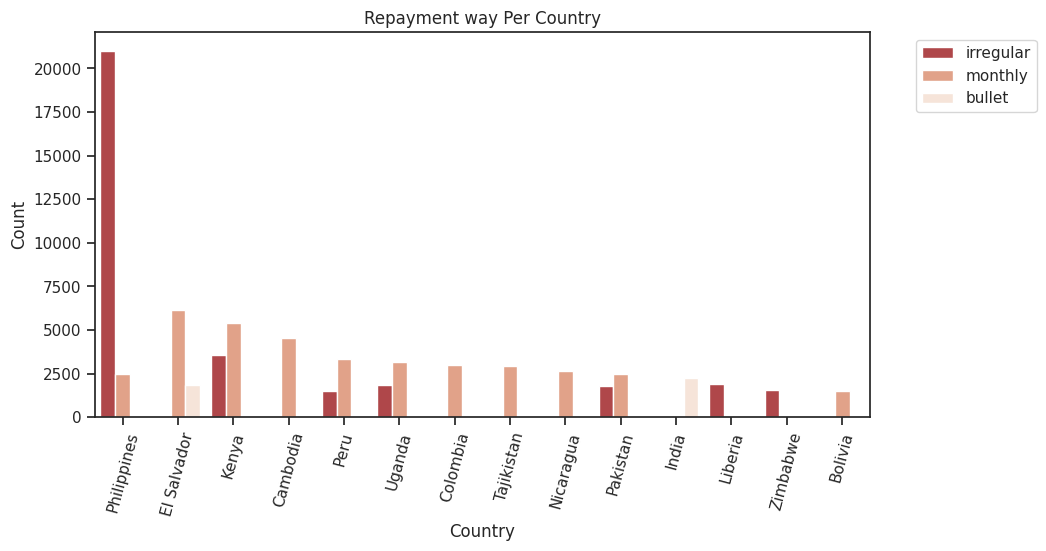

In [102]:
plt.figure(figsize = (10,5))
# Plot bar chart for hieghst countries loan amount
sns.barplot(data=common_repayment, x='country', y='count', hue='repayment_interval')

# Set the labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Repayment way Per Country')
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 75)

# Show the plot
plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">For each country, What is the distribution of borrower_gender?</span>

In [103]:
country_gender = kivaloans.groupby(['country','borrower_genders']).size().sort_values(ascending=False).reset_index(name='count').head(20)
country_gender

,country,borrower_genders,count
0,Philippines,female,22544
1,Kenya,female,6404
2,El Salvador,female,4672
3,El Salvador,male,3783
4,Pakistan,female,3662
5,Kenya,male,2757
6,Peru,female,2579
7,Cambodia,both,2513
8,Uganda,female,2434
9,Tajikistan,female,2276


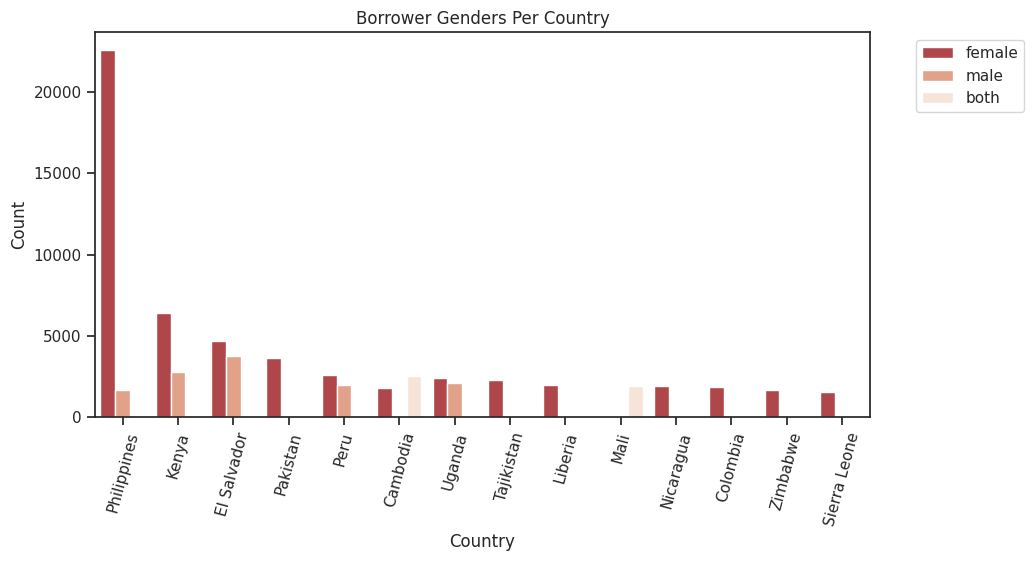

In [104]:
plt.figure(figsize = (10,5))
# Plot bar chart for borrower genders per countries
sns.barplot(data=country_gender, x='country', y='count', hue='borrower_genders')

# Set the labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Borrower Genders Per Country')
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 75)

# Show the plot
plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">For each country, what is the most common sectors?</span>

In [105]:
common_sectors = kivaloans.groupby(['country','sector']).size().sort_values(ascending=False).reset_index(name='count').head(20)
common_sectors

,country,sector,count
0,Philippines,Retail,8198
1,Philippines,Food,5929
2,Philippines,Agriculture,5065
3,Kenya,Agriculture,2867
4,El Salvador,Agriculture,2673
5,Cambodia,Agriculture,2673
6,Kenya,Food,2491
7,El Salvador,Housing,2329
8,Kenya,Retail,1696
9,Philippines,Housing,1405


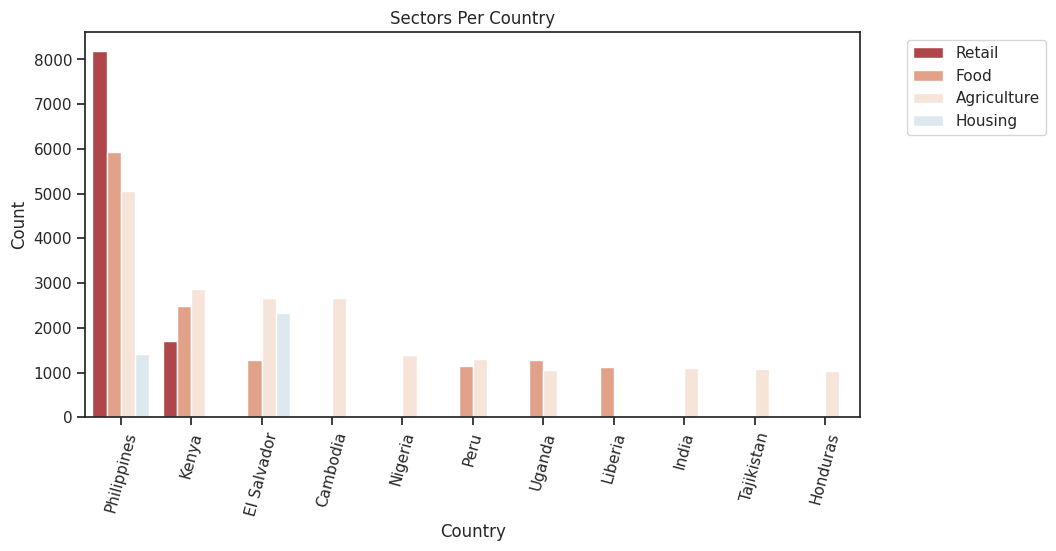

In [106]:
plt.figure(figsize = (10,5))
# Plot bar chart for hieghst sectors per countries
sns.barplot(data=common_sectors, x='country', y='count', hue='sector')

# Set the labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Sectors Per Country')
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 75)

# Show the plot
plt.show()

## <span style="color:#288BA8; font-family:Arial;">Sectors:</span>

#### <span style="color:#000000; font-family:Georgia, serif;">According to activities, What is the Total loan amount for gender?</span>

In [107]:
#for data with one borrower
gender_activities = kivaloans.groupby(['activity', 'borrower_genders'])['loan_amount'].sum()\
        .sort_values(ascending = False).head(10).reset_index()
gender_activities

,activity,borrower_genders,loan_amount
0,Farming,both,4405525.0
1,General Store,female,4177375.0
2,Farming,female,3409650.0
3,Retail,both,2818975.0
4,Personal Housing Expenses,female,2790750.0
5,Clothing Sales,female,2443750.0
6,Agriculture,male,2288925.0
7,Agriculture,female,2147150.0
8,Food Production/Sales,both,2074000.0
9,Farming,male,2051225.0


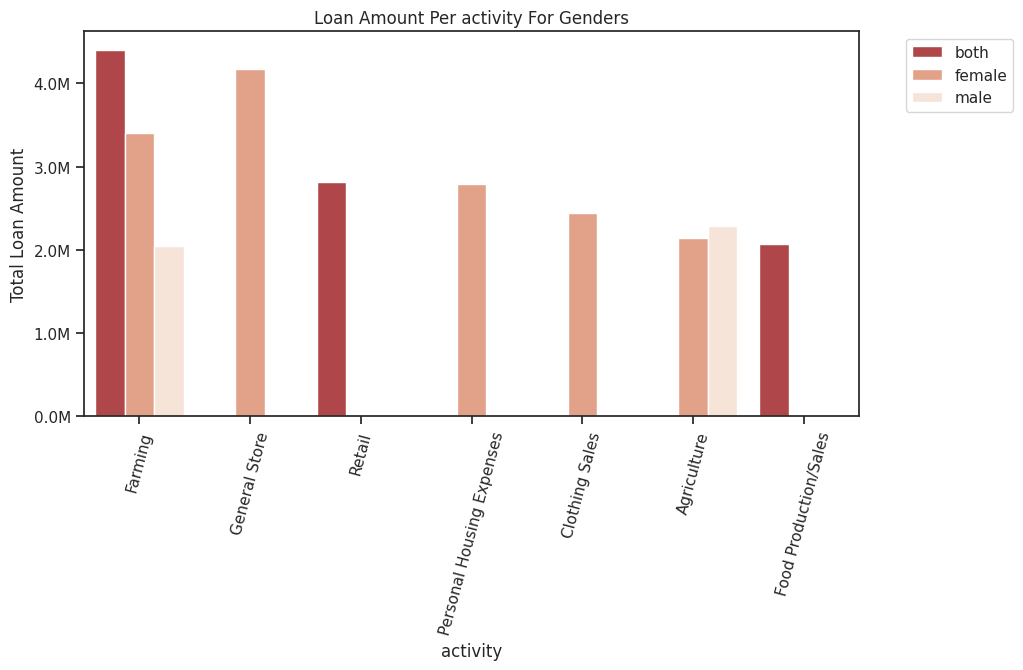

In [109]:
plt.figure(figsize = (10,5))
# Plot bar chart for hieghst countries loan amount
sns.barplot(data=gender_activities, x='activity', y='loan_amount', hue='borrower_genders')

# Set the labels and title
plt.xlabel('activity')
plt.ylabel('Total Loan Amount')
plt.title('Loan Amount Per activity For Genders')
plt.xticks(rotation = 75)
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Convert y-axis tick labels to millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
# Show the plot
plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">What sector got the most loans?</span>

In [110]:
sector_loan_amount = kivaloans.groupby('sector')['loan_amount'].sum()\
        .sort_values(ascending = False).head(10).reset_index()
sector_loan_amount

,sector,loan_amount
0,Agriculture,25633500.0
1,Food,21279075.0
2,Retail,18464350.0
3,Services,8415025.0
4,Clothing,6837125.0
5,Education,5122200.0
6,Housing,5012825.0
7,Transportation,2070050.0
8,Personal Use,2053700.0
9,Arts,1841200.0


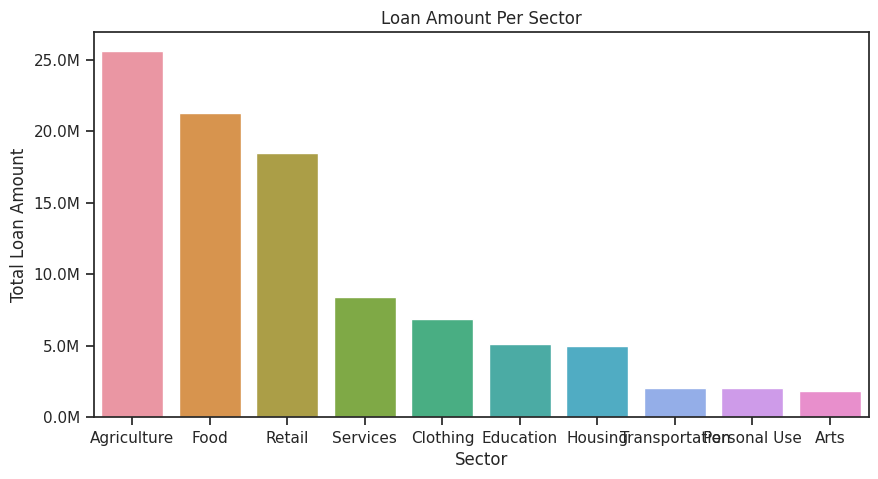

In [111]:
plt.figure(figsize = (10,5))
# Plot bar chart for hieghst countries loan amount
sns.barplot(data=sector_loan_amount, x='sector', y='loan_amount')

# Set the labels and title
plt.xlabel('Sector')
plt.ylabel('Total Loan Amount')
plt.title('Loan Amount Per Sector')
# Convert y-axis tick labels to millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
# Show the plot
plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">For each sector, What is the distribution of borrower_gender?</span>

In [112]:
sector_gender = kivaloans.groupby(['sector','borrower_genders']).size().sort_values(ascending=False).reset_index(name='count').head(20)
sector_gender

,sector,borrower_genders,count
0,Food,female,17342
1,Retail,female,16689
2,Agriculture,female,15341
3,Agriculture,male,9062
4,Housing,female,4984
5,Services,female,4663
6,Agriculture,both,4662
7,Clothing,female,4441
8,Food,both,4252
9,Retail,male,3095


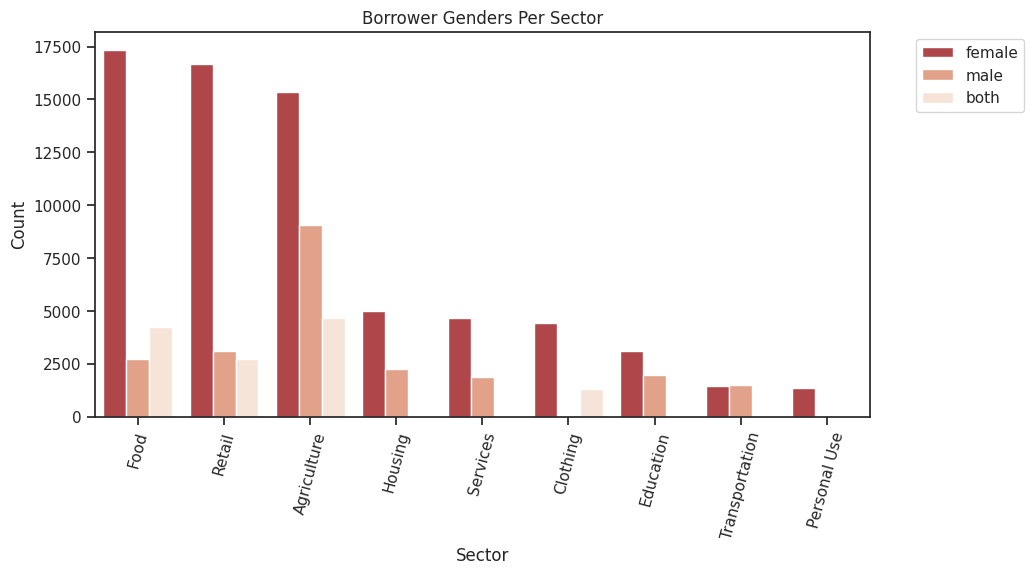

In [113]:
plt.figure(figsize = (10,5))
# Plot bar chart for borrower genders per sectors
sns.barplot(data=sector_gender, x='sector', y='count', hue='borrower_genders')

# Set the labels and title
plt.xlabel('Sector')
plt.ylabel('Count')
plt.title('Borrower Genders Per Sector')
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 75)

# Show the plot
plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">For the top sector, what activity had the highest amount of loans?</span>

In [114]:
# Agriculture sector data
top_sector= kivaloans[kivaloans['sector']=='Agriculture']

In [115]:
# Agriculture sector activities grouping data
sector_loan_activity = top_sector.groupby('activity')[['loan_amount']].sum().sort_values(by='loan_amount',ascending= False).reset_index().head(10)
sector_loan_activity

,activity,loan_amount
0,Farming,9866400.0
1,Agriculture,5312700.0
2,Livestock,2224600.0
3,Animal Sales,2021075.0
4,Pigs,1591675.0
5,Poultry,1454825.0
6,Cattle,1230375.0
7,Dairy,966700.0
8,Farm Supplies,765275.0
9,Flowers,137075.0


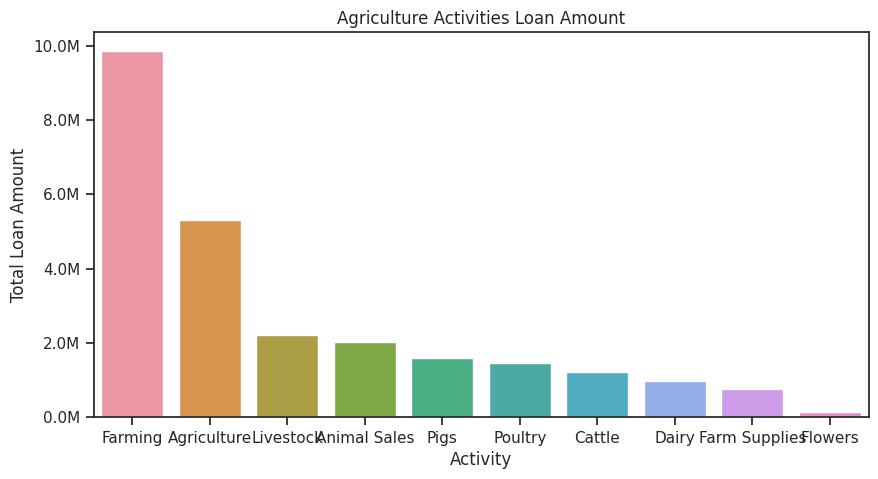

In [116]:
plt.figure(figsize = (10,5))
# Plot bar chart for hieghst activities loan amount
sns.barplot(data=sector_loan_activity, x='activity', y='loan_amount')

# Set the labels and title
plt.xlabel('Activity')
plt.ylabel('Total Loan Amount')
plt.title('Agriculture Activities Loan Amount')
# Convert y-axis tick labels to millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
# Show the plot
plt.show()

## <span style="color:#288BA8; font-family:Arial;">Partners:</span>

#### <span style="color:#000000; font-family:Georgia, serif;">Who are the most dominant field partners?</span>

In [117]:
kivaloans['partner_id'].value_counts()

145    14957
81      3707
199     3456
204     2930
164     2774
       ...  
315        1
313        1
348        1
415        1
268        1
Name: partner_id, Length: 235, dtype: int64

In [118]:
partners.sample()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
13684,384,Kingsbridge Microfinance,General Financial Inclusion,a1050000005apAI,General,Ghana,Yes,"West Legon, Accra",NaN,GHA,...,1450,"West Legon, Accra, Ghana","[(5.6536455, -0.2080547)]",West Legon; Accra; Accra Metropolis; Greater A...,"(5.6536455, -0.2080547)",5.653646,-0.208055,"Greater Accra, Ghana","(5.8142836, 0.0746767)",75.0


In [119]:
partners[partners['Partner ID']==145]['Field Partner Name']

7290    Negros Women for Tomorrow Foundation (NWTF)
7291    Negros Women for Tomorrow Foundation (NWTF)
7292    Negros Women for Tomorrow Foundation (NWTF)
7293    Negros Women for Tomorrow Foundation (NWTF)
7294    Negros Women for Tomorrow Foundation (NWTF)
                           ...                     
7585    Negros Women for Tomorrow Foundation (NWTF)
7586    Negros Women for Tomorrow Foundation (NWTF)
7587    Negros Women for Tomorrow Foundation (NWTF)
7588    Negros Women for Tomorrow Foundation (NWTF)
7589    Negros Women for Tomorrow Foundation (NWTF)
Name: Field Partner Name, Length: 300, dtype: object

<span style="color:navy; font-family:Ari4al; font-weight: bold;">This shows that Negros Women for Tomorrow Foundation (NWTF) institution is the most dominant field partners</span>

#### <span style="color:#000000; font-family:Georgia, serif;">For each country, What is the number of partners according to sectors?</span>

In [120]:
country_sector_partener= kivaloans.groupby(['country', 'sector'])['partner_id'].count()\
    .sort_values(ascending=False).reset_index(name='count').head(20)
country_sector_partener

,country,sector,count
0,Philippines,Retail,8198
1,Philippines,Food,5929
2,Philippines,Agriculture,5065
3,Kenya,Agriculture,2867
4,El Salvador,Agriculture,2673
5,Cambodia,Agriculture,2673
6,Kenya,Food,2491
7,El Salvador,Housing,2329
8,Kenya,Retail,1696
9,Philippines,Housing,1405


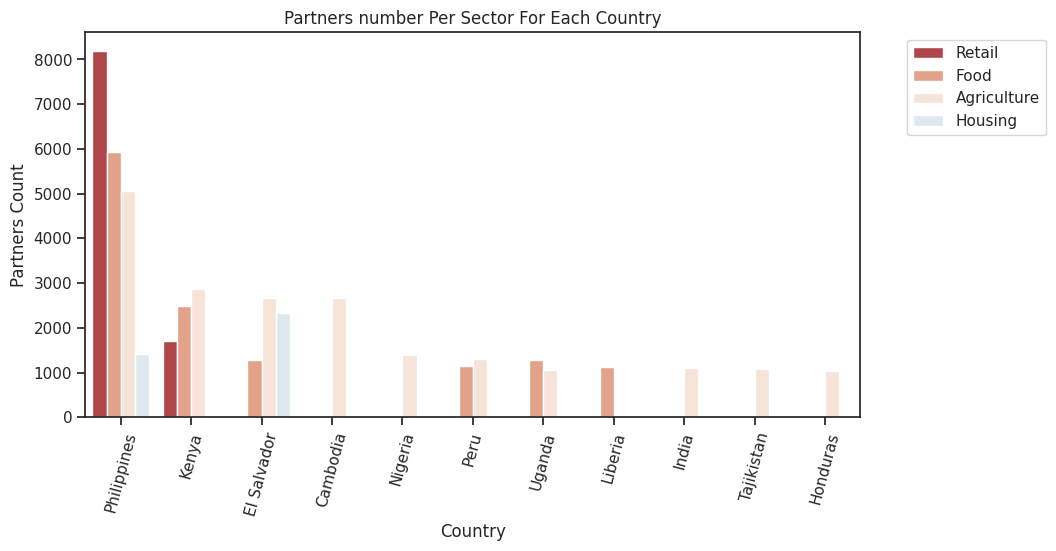

In [121]:
plt.figure(figsize = (10,5))
# Plot bar chart for Partners number Per Sector For Each Country
sns.barplot(data=country_sector_partener, x='country', y='count', hue='sector')

# Set the labels and title
plt.xlabel('Country')
plt.ylabel('Partners Count')
plt.title('Partners number Per Sector For Each Country')
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 75)

# Show the plot
plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">What are the sectors funded by the most dominant field partners?</span>

In [122]:
top_partner_sectors= kivaloans[kivaloans['partner_id']==145].groupby('sector')['funded_amount'].sum().sort_values(ascending=False).reset_index(name='total')
top_partner_sectors

,sector,total
0,Retail,1896000.0
1,Food,1436075.0
2,Agriculture,837975.0
3,Housing,266100.0
4,Services,148900.0
5,Transportation,114500.0
6,Clothing,94925.0
7,Arts,85375.0
8,Manufacturing,65975.0
9,Construction,28875.0


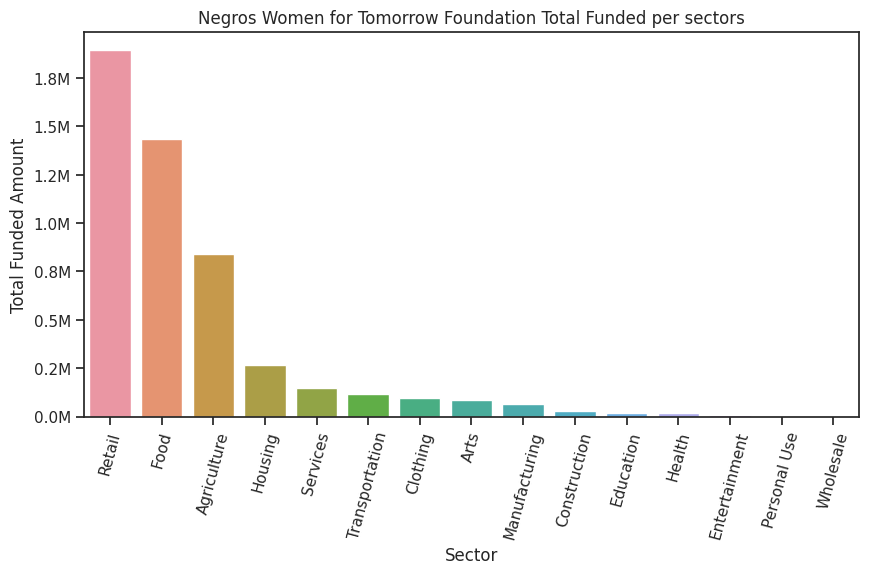

In [123]:
plt.figure(figsize = (10,5))
# Plot bar chart for Partners number Per Sector For Each Country
sns.barplot(data=top_partner_sectors, x='sector', y='total')

# Set the labels and title
plt.xlabel('Sector')
plt.ylabel('Total Funded Amount')
plt.title('Negros Women for Tomorrow Foundation Total Funded per sectors')
# Convert y-axis tick labels to millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.xticks(rotation = 75)

# Show the plot
plt.show()

## <span style="color:#288BA8; font-family:Arial;">Grouped Borrower:</span>

#### <span style="color:#000000; font-family:Georgia, serif;">What is the most sectors have grouped_borrower?</span>

In [124]:
kivaloans[kivaloans['borrower_genders']=='both']['sector'].value_counts().sort_values(ascending=False)

Agriculture       4662
Food              4252
Retail            2723
Clothing          1310
Services           984
Personal Use       846
Arts               342
Housing            255
Education          184
Construction       152
Health             136
Manufacturing      111
Transportation      90
Wholesale            6
Entertainment        1
Name: sector, dtype: int64

#### <span style="color:navy; font-family:'Gill Sans Extrabold', sans-serif; font-weight: bold;">This shows that Grouped borrowered does not related with any sectors</span>

#### <span style="color:#000000; font-family:Georgia, serif;">What is the most countries have grouped_borrower?</span>

In [127]:
grouped_borrower= kivaloans[kivaloans['borrower_genders']=='both']['country'].value_counts().sort_values(ascending=False)\
.head(10).reset_index(name='count')
grouped_borrower

,index,count
0,Cambodia,2513
1,Mali,1913
2,Paraguay,908
3,India,907
4,Tanzania,768
5,Vietnam,765
6,Peru,743
7,Yemen,601
8,Guatemala,588
9,Nicaragua,519


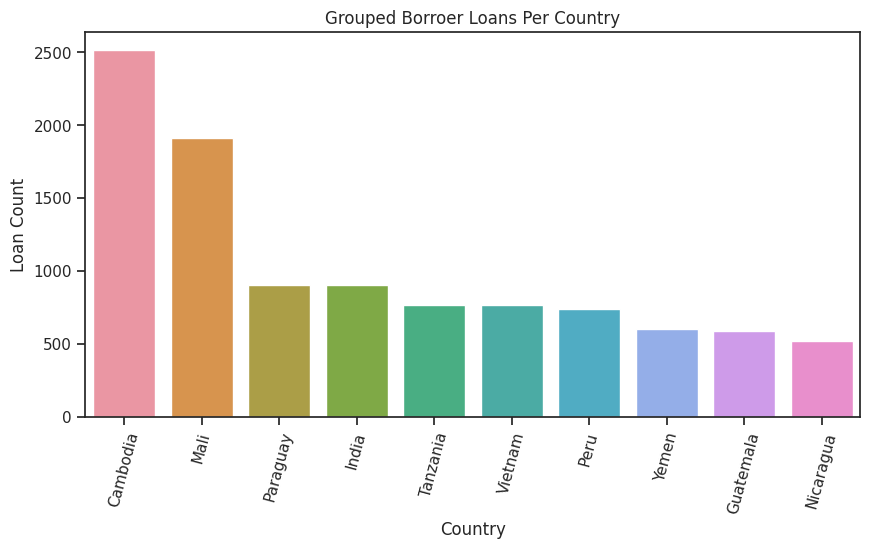

In [129]:
plt.figure(figsize = (10,5))
# Plot bar chart for Grouped Borroer Loans Per Country
sns.barplot(data=grouped_borrower, x='index', y='count')

# Set the labels and title
plt.xlabel('Country')
plt.ylabel('Loan Count')
plt.title('Grouped Borroer Loans Per Country')
plt.xticks(rotation = 75)

# Show the plot
plt.show()

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;">This shows that the country of Cambodia, followed by Kenya, has the most grouped borrowed loans, and this is likely due to the decline of the currency against the dollar, as the dollar is equal to 4133.46 Cambodian riyals</span>

#### <span style="color:navy; font-family:Ari4al; font-weight: bold;">Now, We will see The Total loans amount for one borrower and grouped borrwer in both of cambodia and kenya</span>

In [130]:
one_borrower_loan= kivaloans[(kivaloans['borrower_genders']!='both')&(kivaloans['country'].isin(['Cambodia', 'Kenya']))]
one_borrower_loan.sample()

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,loan_months,lender_count,borrower_genders,repayment_interval,disbursed_date,borrower_count
date,,,,,,,,,,,,,,,,,,,
2014-03-27,689776,1100.0,1100.0,Fruits & Vegetables,Food,to buy a motorbike to transport her vegetables...,Cambodia,"Kandal province, Kandal Stoeng district",USD,204,2014-03-27 08:45:36+00:00,2014-03-04 08:00:00+00:00,2014-03-30 19:39:32+00:00,25,32.0,female,monthly,2014-03-04,1


In [131]:
group_borrower_loan= kivaloans[(kivaloans['borrower_genders']=='both')&(kivaloans['country'].isin(['Cambodia', 'Kenya']))]
group_borrower_loan.sample()

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,loan_months,lender_count,borrower_genders,repayment_interval,disbursed_date,borrower_count
date,,,,,,,,,,,,,,,,,,,
2014-05-20,712722,625.0,625.0,Farming,Agriculture,buy fertilizers and other farm supplies,Cambodia,"Battambang province, Thmor Koul district",KHR,204,2014-05-20 09:08:06+00:00,2014-04-23 07:00:00+00:00,2014-06-22 08:32:13+00:00,14,19.0,both,monthly,2014-04-23,2


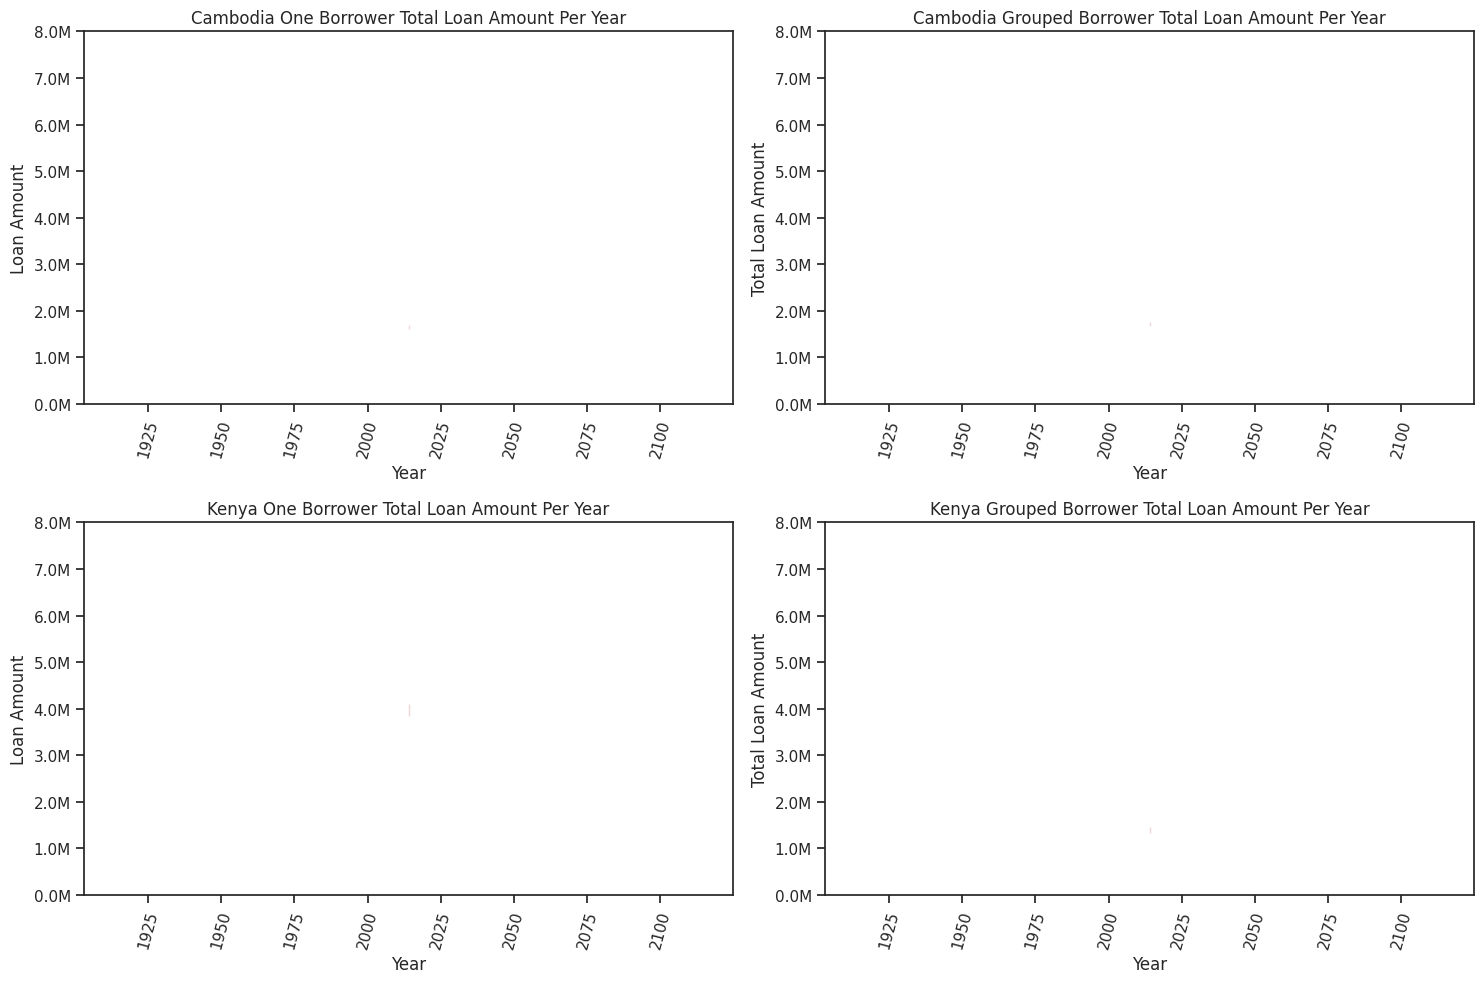

In [132]:
plt.figure(figsize=[15, 10])

# Plot for Cambodia - One borrower
plt.subplot(2, 2, 1)
sns.lineplot(data=one_borrower_loan[one_borrower_loan['country'] == 'Cambodia'],
             x=one_borrower_loan[one_borrower_loan['country'] == 'Cambodia'].index.year, y='loan_amount',
             estimator=sum)
plt.title('Cambodia One Borrower Total Loan Amount Per Year')
plt.xlabel('Year')
plt.ylabel('Loan Amount')
plt.xticks(rotation=75)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))
plt.ylim(0, 8000000)  # Set the same y-axis range for all plots

# Plot for Cambodia - Grouped borrowers
plt.subplot(2, 2, 2)
sns.lineplot(data=group_borrower_loan[group_borrower_loan['country'] == 'Cambodia'],
             x=group_borrower_loan[group_borrower_loan['country'] == 'Cambodia'].index.year, y='loan_amount',
             estimator=sum)
plt.title("Cambodia Grouped Borrower Total Loan Amount Per Year")
plt.xlabel('Year')
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=75)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))
plt.ylim(0, 8000000)  # Set the same y-axis range for all plots

# Plot for Kenya - One borrower
plt.subplot(2, 2, 3)
sns.lineplot(data=one_borrower_loan[one_borrower_loan['country'] == 'Kenya'],
             x=one_borrower_loan[one_borrower_loan['country'] == 'Kenya'].index.year, y='loan_amount',
             estimator=sum)
plt.title('Kenya One Borrower Total Loan Amount Per Year')
plt.xlabel('Year')
plt.ylabel('Loan Amount')
plt.xticks(rotation=75)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))
plt.ylim(0, 8000000)  # Set the same y-axis range for all plots

# Plot for Kenya - Grouped borrowers
plt.subplot(2, 2, 4)
sns.lineplot(data=group_borrower_loan[group_borrower_loan['country'] == 'Kenya'],
             x=group_borrower_loan[group_borrower_loan['country'] == 'Kenya'].index.year, y='loan_amount',
             estimator=sum)
plt.title("Kenya Grouped Borrower Total Loan Amount Per Year")
plt.xlabel('Year')
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=75)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))
plt.ylim(0, 8000000)  # Set the same y-axis range for all plots


# Display the plots
plt.tight_layout()
plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">What is the most use have grouped_borrower?</span>

In [133]:
grouped_borrower_use= kivaloans[kivaloans['borrower_genders']=='both']['use'].value_counts().sort_values(ascending=False)\
.head(10).reset_index(name='count')
grouped_borrower_use

,index,count
0,buy fertilizers and other farm supplies,1906
1,clothing to sell,455
2,buy water filter,302
3,buy ingredients forfood production business,271
4,buy farm inputs,140
5,buy enough merchandise to sell at markets,129
6,buy solar,95
7,build sanitary toilet,89
8,to buy a smokeless stove,82
9,buy groceries to sell,59


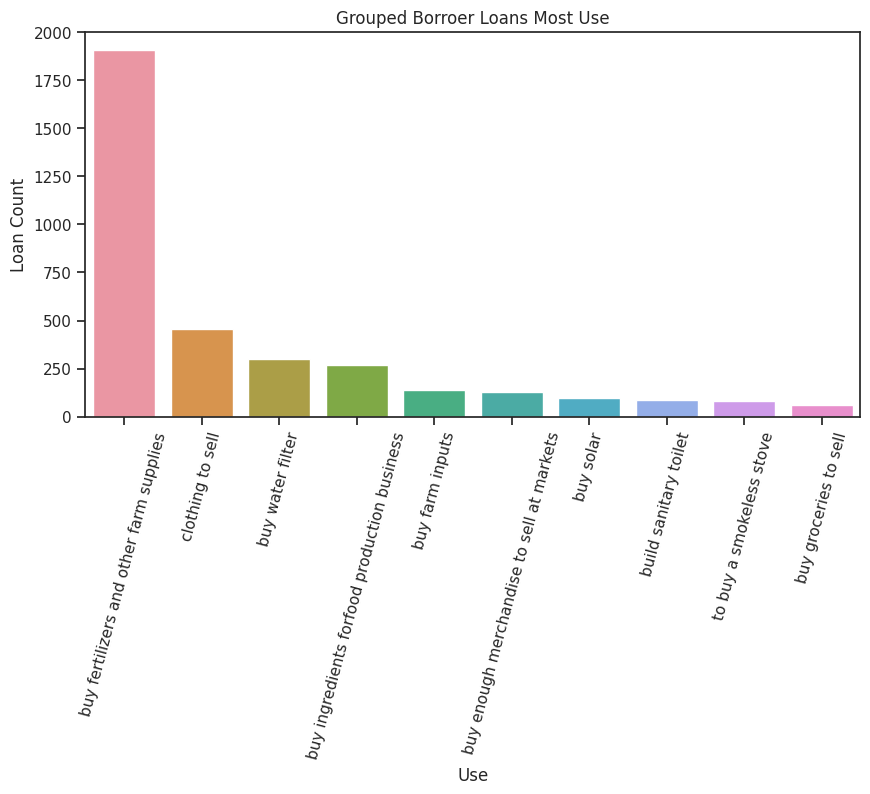

In [135]:
plt.figure(figsize = (10,5))
# Plot bar chart for Grouped Borroer Loans Per Country
sns.barplot(data=grouped_borrower_use, x='index', y='count')

# Set the labels and title
plt.xlabel('Use')
plt.ylabel('Loan Count')
plt.title('Grouped Borroer Loans Most Use')
plt.xticks(rotation = 75)

# Show the plot
plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">What is the common repayment intervals for grouped_borrower?</span>

In [136]:
grouped_borrower_repay= kivaloans[kivaloans['borrower_genders']=='both']['repayment_interval'].value_counts().sort_values(ascending=False)\
.head(10).reset_index(name='count')
grouped_borrower_repay

,index,count
0,monthly,8788
1,irregular,4999
2,bullet,2267


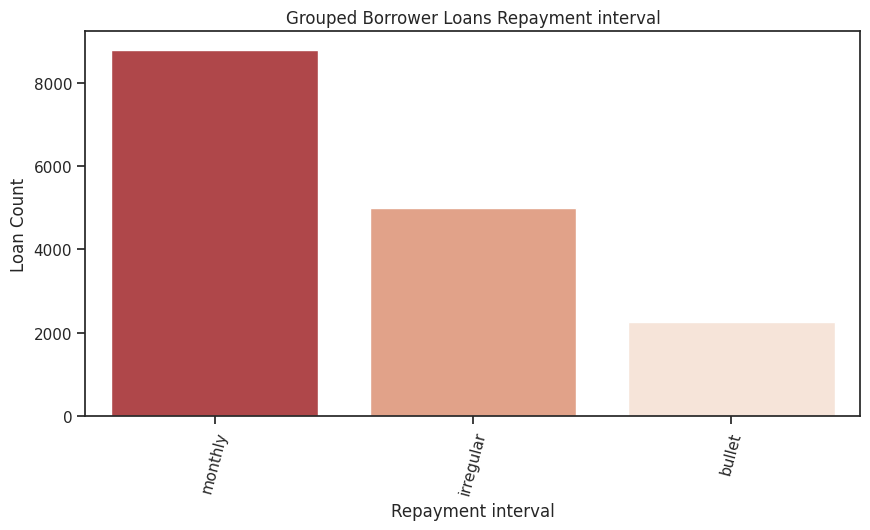

In [138]:
plt.figure(figsize = (10,5))
# Plot bar chart for Grouped Borroer Loans Per Country
sns.barplot(data=grouped_borrower_repay, x='index', y='count')

# Set the labels and title
plt.xlabel('Repayment interval')
plt.ylabel('Loan Count')
plt.title('Grouped Borrower Loans Repayment interval')
plt.xticks(rotation = 75)

# Show the plot
plt.show()

#### <span style="color:#000000; font-family:Georgia, serif;">what is the total loans per year for grouped_borrower?</span>

In [139]:
group_borrower_total_loan= kivaloans[kivaloans['borrower_genders']=='both']
group_borrower_total_loan.sample()

,id,funded_amount,loan_amount,activity,sector,use,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,loan_months,lender_count,borrower_genders,repayment_interval,disbursed_date,borrower_count
date,,,,,,,,,,,,,,,,,,,
2014-05-07,706954,1950.0,1950.0,Poultry,Agriculture,To increase the number of chickens that she ra...,Zimbabwe,Harare,USD,367,2014-05-07 15:04:43+00:00,2014-04-23 07:00:00+00:00,2014-05-13 23:59:00+00:00,8,67.0,both,monthly,2014-04-23,5


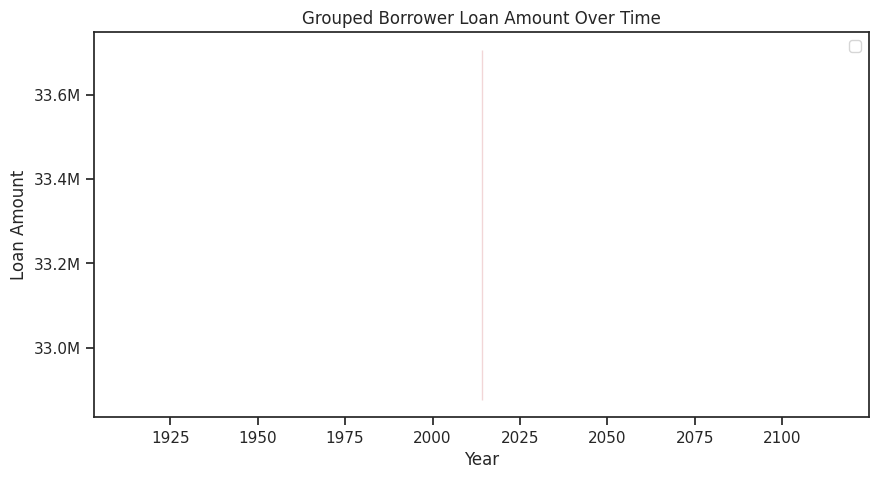

In [140]:
plt.figure(figsize = (10,5))
# Plot line chart for 'funded_amount'
sns.lineplot(data=group_borrower_total_loan, x=group_borrower_total_loan.index.year, y='loan_amount',
             estimator=sum)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Loan Amount')
plt.title('Grouped Borrower Loan Amount Over Time')
plt.legend()
# Convert y-axis tick labels to millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
# Show the plot
plt.show()